# 시험장 환경 정보

Python: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]

|모듈|버젼|
|----|----|
|pandas|0.25.1|
|numpy|1.18.5|
|sklearn|0.21.3|
|scipy|1.5.2|
|mlxtend|0.15.0.0|
|statsmodels|0.11.1|
|imblearn|0.5.0|
|xgboost|0.80|

**멀티캠퍼스 강선구 (sunku0316.kang@multicampus.com)**

In [2]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import mlxtend
import statsmodels
import imblearn
import xgboost
import sys

print(sys.version)
for i in [pd, np, sklearn, scipy, statsmodels, mlxtend, imblearn, xgboost]:
    print(i.__name__, i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
statsmodels 0.11.1
mlxtend 0.15.0.0
imblearn 0.5.0
xgboost 0.80


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#  대문항 세트1

암호 화폐의 가격 변동을 분석하고자 약 1년 간의 일자 별 암호 화폐 정보를 조사하였습니다. 다음은 분석에 활용할 데이터입니다.

prof2102_1.csv (구분자: Comma(,), 40,100 Rows, 10 Columns, UTF-8 인코딩)

|컬럼|정의|타입|
|----|----|----|
|datetime|날짜|String|
|low|저가 (USD 달러)|Double|
|high|고가 (USD 달러)|Double|
|open|시작가 (USD 달러)|Double|
|close|종료가 (USD 달러)|Double|
|volumefrom|거래량|Double|
|volumeto|거래량 (USD 달러)|Double|
|cryptocurrency|암호 화폐 symbol|String|
|image_url|암호 화폐 로고의 url|String|
|coin_name|암호 화폐 이름|String|


## 공통 전처리


**(prof2102_1.csv를 이용하여)** 분석에 앞서 다음의 전처리를 **순차적으로** 수행하시오.

**A-1.** 암호 화폐 이름(coin_name)이 ‘Bitcoin’인 행만으로 구성된 데이터로, 날짜(datetime)와 종료가(close) 컬럼만을 남깁니다.

위의 전처리 과정을 완료한 데이터셋을 ‘bitcoin#1’ (401 Rows, 2 Columns)으로 정의한다.

(이후 문항에서의 지칭을 위하여 데이터셋 이름을 정의한 것으로, 제출 소스코드에서 반드시 위의 이름을 따를 필요는 없다.)


In [10]:
# 방법 1
# read_csv 시 parse_dates를 통해 불러 올때 일자형으로 만들수 있습니다.
# 일자를 index로 두어 forecast할 때 일자형식으로 받아 올수 있게합니다.
df_bitcoin_org = pd.read_csv('data/prof2102_1.csv', parse_dates=['datetime'], index_col='datetime')
df_bitcoin_org

,low,high,open,close,volumefrom,volumeto,cryptocurrency,image_url,coin_name
datetime,,,,,,,,,
2019-12-06,7323.86,7607.79,7406.75,7558.58,28169.83,2.098513e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin
2019-12-07,7503.10,7640.51,7558.58,7514.86,14093.87,1.065722e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin
2019-12-08,7414.51,7594.80,7514.86,7539.70,15949.09,1.200003e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin
2019-12-09,7296.42,7667.04,7539.70,7350.62,35089.72,2.621613e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin
2019-12-10,7176.42,7403.64,7350.62,7233.84,23348.59,1.704194e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin
...,...,...,...,...,...,...,...,...,...
2021-01-05,47.21,52.25,48.33,47.31,70216.69,3.322178e+06,DCR,https://www.cryptocompare.com/media/1382607/de...,Decred
2021-01-06,50.82,56.12,47.31,54.91,158525.88,8.704068e+06,DCR,https://www.cryptocompare.com/media/1382607/de...,Decred
2021-01-07,54.52,60.84,54.91,58.55,103968.42,6.087139e+06,DCR,https://www.cryptocompare.com/media/1382607/de...,Decred


In [12]:
# 방법 2
df_bitcoin_org = pd.read_csv('data/prof2102_1.csv')
# pd.to_datetime으로 일자형 변환을 통해서도 할 수 일자로 만들 수 있습니다.
df_bitcoin_org['datetime'] = pd.to_datetime(df_bitcoin_org['datetime'])
df_bitcoin_org.set_index('datetime', inplace=True)

In [13]:
df_bitcoin_org.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40100 entries, 2019-12-06 to 2021-01-09
Data columns (total 9 columns):
low               40100 non-null float64
high              40100 non-null float64
open              40100 non-null float64
close             40100 non-null float64
volumefrom        40100 non-null float64
volumeto          40100 non-null float64
cryptocurrency    40100 non-null object
image_url         40100 non-null object
coin_name         40100 non-null object
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


In [14]:
df_bitcoin_org.head()

,low,high,open,close,volumefrom,volumeto,cryptocurrency,image_url,coin_name
datetime,,,,,,,,,
2019-12-06,7323.86,7607.79,7406.75,7558.58,28169.83,2.098513e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin
2019-12-07,7503.10,7640.51,7558.58,7514.86,14093.87,1.065722e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin
2019-12-08,7414.51,7594.80,7514.86,7539.70,15949.09,1.200003e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin
2019-12-09,7296.42,7667.04,7539.70,7350.62,35089.72,2.621613e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin
2019-12-10,7176.42,7403.64,7350.62,7233.84,23348.59,1.704194e+08,BTC,https://www.cryptocompare.com/media/19633/btc.png,Bitcoin


In [65]:
df_bitcoin1 = df_bitcoin_org.loc[
    df_bitcoin_org['coin_name'] == 'Bitcoin', ['close']
].copy() #‘Bitcoin’인 행만으로 구성된 데이터로, 날짜(datetime)와 종료가(close) 컬럼만을 남깁니다
df_bitcoin1

,close
datetime,
2019-12-06,7558.58
2019-12-07,7514.86
2019-12-08,7539.70
2019-12-09,7350.62
2019-12-10,7233.84
...,...
2021-01-05,34038.29
2021-01-06,36849.86
2021-01-07,39479.41


## 문제 1번 - 10점

**(bitcoin#1을 이용하여)** Holt-Winters Model은 시계열 분석을 위한 기준 모델 중 하나로써 수준, 추세, 계절성 정보를 반영할 수 있습니다. 이에 따라 먼저 Holt-Winters 모형을 적용하여 데이터의 대략적인 시계열 패턴을 파악하고자 합니다.

‘2020-09-30’까지의 종료가(close)에 대해, 주기가 7인 Holt-Winters 가법 모델을 학습하고, 학습된 모델을 활용하여 이후 날짜(101일)의 종료가(close)를 예측합니다. 예측된 결과를 활용하여, 다음의 성능 지표 A를 구하시오.

$ A = \sqrt{\frac{\sum_{i=1}^{n}(y_i - p_i)^2}{n}} $

여기서, i번째 실제 종료가(close)를 $y_i$, i번째 예측된 종료가(close)를 $p_i$를 의미합니다.

**Python 함수가이드**
```
from statsmodels.tsa.api import ExponentialSmoothing
trend='additive',seasonal='additive' 로 설정
문제 지시 외 파라미터는 default 값 사용
```

성능 지표 A를 소수점 넷째 자리에서 반올림하여 셋째 자리까지 기술하시오.


 (답안예시) 1002.345

In [66]:
# 데이터를 확인해봅니다.
df_bitcoin1.loc[df_bitcoin1.index <= '2020-09-30', 'close']

datetime
2019-12-06     7558.58
2019-12-07     7514.86
2019-12-08     7539.70
2019-12-09     7350.62
2019-12-10     7233.84
                ...   
2020-09-26    10734.23
2020-09-27    10781.47
2020-09-28    10699.00
2020-09-29    10841.29
2020-09-30    10779.42
Name: close, Length: 300, dtype: float64

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

es = ExponentialSmoothing(
    df_bitcoin1.loc[df_bitcoin1.index <= '2020-09-30', 'close'], # ‘2020-09-30’까지의 종료가(close)에 대해 학습합니다
    trend='additive',seasonal='additive', # 가법 모델을 학습합니다
    seasonal_periods = 7, # ‘주기가 7입니다
    freq='D'
).fit()
A = mean_squared_error(
    df_bitcoin1.loc[df_bitcoin1.index > '2020-09-30', 'close'],  
    es.forecast(101) # 학습된 모델을 활용하여 이후 날짜(101일)의 종료가(close)를 예측
) ** 0.5
A

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\student\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


9892.895710432807

In [69]:
# round는 태생적으로 결과값에 오차가 있습니다.
# 출제 위원들은 이 오차를 고려하는데요, 이 오차가 나지 않는 것은 답으로 도출하게 한다고 합니다.
round(A, 3)

9892.896

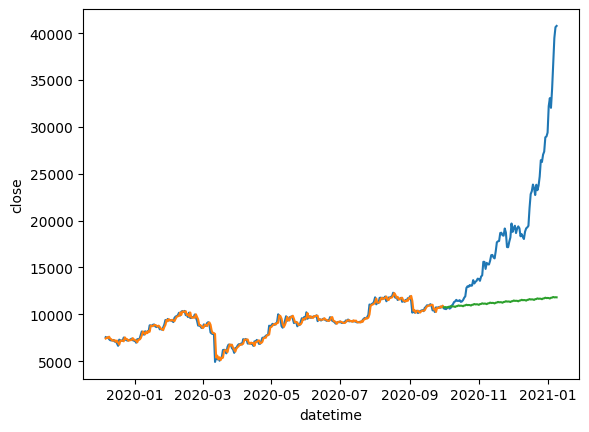

In [72]:
# 어떤 결과를 보이는지 확인해 봅니다.
sns.lineplot(data=df_bitcoin1.reset_index(), x='datetime', y='close')
sns.lineplot(x=df_bitcoin1.loc[df_bitcoin1.index <= '2020-09-30'].index, y=es.predict(0, 299))
sns.lineplot(x=df_bitcoin1.loc[df_bitcoin1.index > '2020-09-30'].index, y=es.forecast(101))
plt.show()

**9892.896**

## 문제 2번10점

**(bitcoin#1을 이용하여)** 이제2번부터 4번까지는 다른 방법의 시계열을 모델링하고자 합니다. 우선 모델링에 앞서 시계열이 정상성을 갖는지를 확인할 것입니다. 정상성이 만족되지 않는 시계열은 사용하기에 많은 제약이 생기기 때문입니다. 이에 따라 본 문제에서는 정상성을 알아보기 위한 방법으로, Augmented Dickey Fuller(ADF) 검정을 수행합니다.

**Python 함수가이드**
```
from statsmodels.tsa.stattools import adfuller
문제 지시 외 파라미터는 default 값 사용
```

종료가(close)에 대하여 Augmented Dickey Fuller(ADF) 검정을 수행할 때, 검정통계량을 기술하시오.
소수점 둘째 자리에서 반올림하여 첫째 자리까지 기술하시오.


 (답안예시) 1.2


In [36]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_bitcoin1['close'])

(7.704878219787651,
 1.0,
 0,
 400,
 {'1%': -3.4468044036406247, '5%': -2.868792838125, '10%': -2.57063355625},
 5786.204067911188)

**7.7**

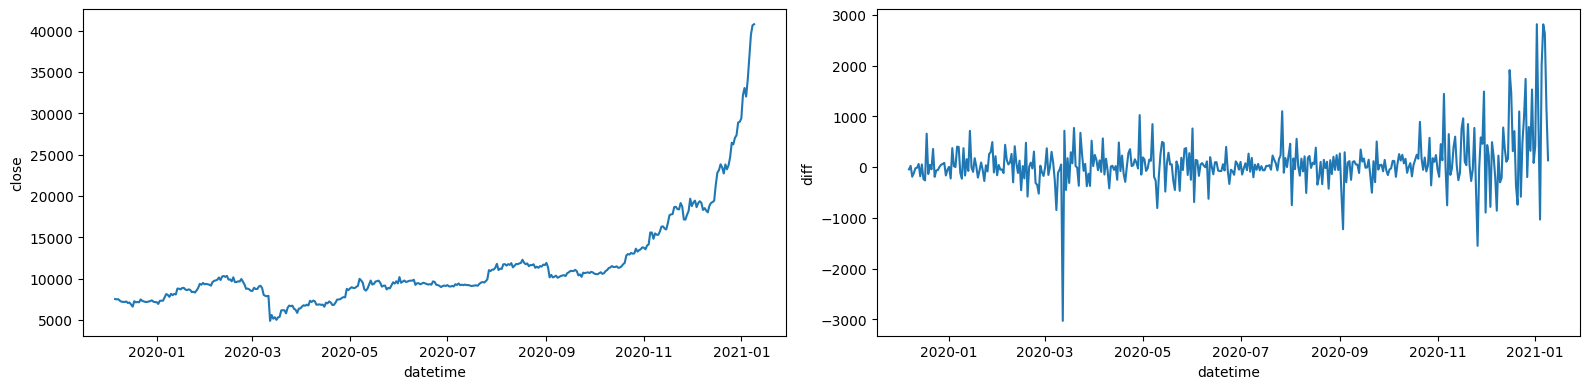

In [39]:
# close의 추세와 close 차분의 추세를 살펴봅니다.
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.lineplot(data=df_bitcoin1, x='datetime', y='close', ax=axes[0])
sns.lineplot(
    data=df_bitcoin1.assign(diff=df_bitcoin1['close'] - df_bitcoin1['close'].shift(1)), 
    x='datetime', y='diff', ax=axes[1])
plt.tight_layout()
plt.show()

## 문제 3번 10점

**(bitcoin#1을 이용하여)** 이제 데이터를 차분한 후 ARIMA (Auto-regressive Integrated Moving Average) 모델을 적용하여 데이터를 예측하고 예측력을 평가하고자 합니다. ARIMA 모델은 차분한 데이터를 자기회귀와 이동 평균 모델과 결합한 모델로써, 복잡한 시계열 데이터를 모델링할 수 있는 이점이 존재합니다. 


**Step 3-1.** 

다음과 같이 새로운 수익률 변수 return을 정의합니다.

$return_t=ln⁡(\frac{close_t}{close_{t-1}})$

t=1인 경우 결측치가 생성되는데 이 결측치는 제거하시오. (제거 후 rows=400)

 (답안예시) 0.12

In [44]:
# assign을 통해 파생변수를 생성과 동시에 새로운 데이터프레임을 만듭니다.
df_bitcoin3 = df_bitcoin1.assign(
    ret=lambda x: np.log(x['close'] / x['close'].shift(1)) 
).dropna()
df_bitcoin3

,close,ret
datetime,,
2019-12-07,7514.86,-0.005801
2019-12-08,7539.70,0.003300
2019-12-09,7350.62,-0.025398
2019-12-10,7233.84,-0.016015
2019-12-11,7212.01,-0.003022
...,...,...
2021-01-05,34038.29,0.060796
2021-01-06,36849.86,0.079366
2021-01-07,39479.41,0.068927


**Step 3-2.** 

이제 날짜(datetime)가 ‘2020-10-01’까지의 return으로 ARIMA 모델을 훈련하고, 

그 이후의 return의 예측값과 실제값을 비교하려 합니다. 

이 때, ARIMA model에서 autoregressive model의 order는 1, 차분 횟수는 0, moving average model의 order는 1로 합니다.

i번째 실제 return을 $y_i$, i번째 예측된 return을 $p_i$라 할 때, 다음과 같이 정의되는 모델의 성능 지표 A를 구하시오.

$ A = \sqrt{\frac{\sum_{i=1}^{n}(y_i - p_i)^2}{n}} $

소수점 셋째 자리에서 반올림하여 둘째 자리까지 기술하시오.


**Python 함수가이드**
```
from statsmodels.tsa.api import SARIMAX
seasonal_order=(1, 0, 1, 7)로 설정
문제 지시 외 파라미터는 default 값 사용
```

In [48]:
from statsmodels.tsa.api import SARIMAX

srma = SARIMAX(
    df_bitcoin3.loc[df_bitcoin3.index <= '2020-10-01', 'ret'], #‘2020-10-01’까지의 return을 입력합니다.
    order=(1, 0, 1), # autoregressive model의 order는 1, 차분 횟수는 0(차분은 ret 파생변수를 만들면서 적용되어 0으로 설정시킨듯 보입니다.), moving average model의 order는 1로 설정합니다. 
    seasonal_order=(1, 0, 1, 7),
    freq='D'
).fit()

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_bitcoin3.loc[df_bitcoin3.index > '2020-10-01', 'ret'],  srma.forecast(100)) ** 0.5

0.03466119500815353

**0.03**

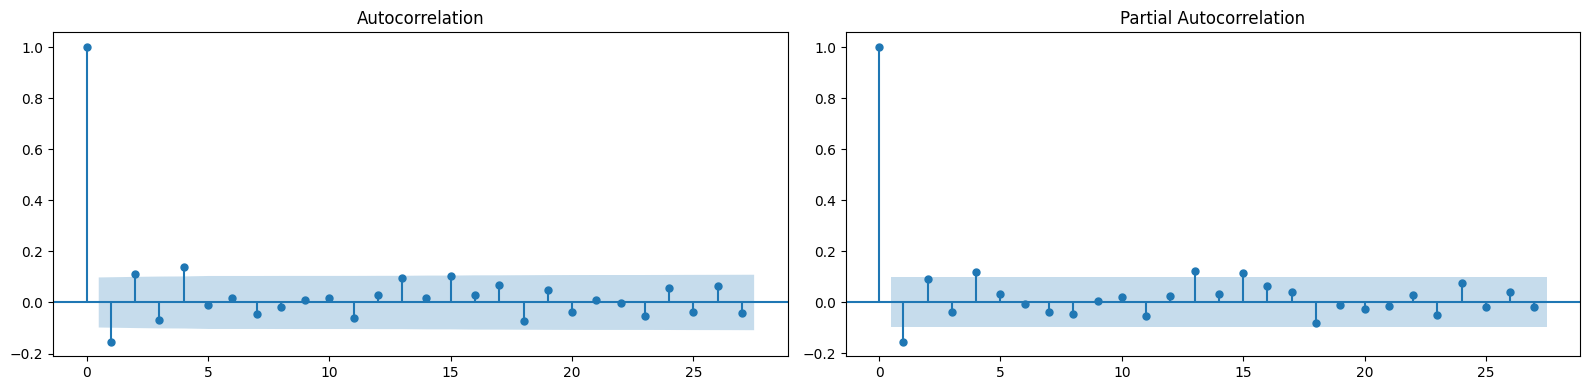

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# AR, MA가 어떻게 파생됐는지 살펴보기위해 acf와 pacf 차트를 그려봅니다.
_, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df_bitcoin3['ret'], ax=axes[0])
plot_pacf(df_bitcoin3['ret'], ax=axes[1])
plt.tight_layout()
plt.show()

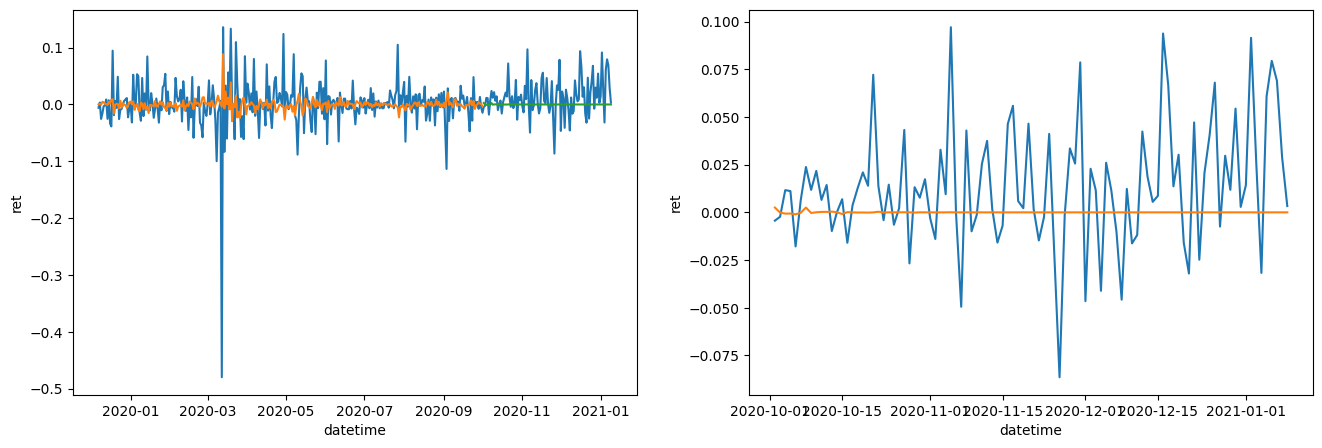

In [80]:
# 어떤 결과를 보이는지 확인해 봅니다.
_, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(data=df_bitcoin3.reset_index(), x='datetime', y='ret', ax=axes[0])
sns.lineplot(x=df_bitcoin3.loc[df_bitcoin3.index <= '2020-10-01'].index, y=srma.predict(0, 299), ax=axes[0])
sns.lineplot(x=df_bitcoin3.loc[df_bitcoin3.index > '2020-10-01'].index, y=srma.forecast(100), ax=axes[0])

# 예측한 부분을 살펴봅니다. 
sns.lineplot(data=df_bitcoin3.loc[df_bitcoin3.index > '2020-10-01'].reset_index(), x='datetime', y='ret', ax=axes[1])
sns.lineplot(x=df_bitcoin3.loc[df_bitcoin3.index > '2020-10-01'].index, y=srma.forecast(100), ax=axes[1])
plt.show()

## 문제 4번 10점


**(bitcoin#1을 이용하여)** 이번에는 시계열 모델링 대신 머신 러닝 기법을 이용해 가격 예측 모형을 수립하고 이를 평가하고자 합니다. 즉 적절한 다차원 Input을 정의한 다음 Input과 Output 사이의 관계를 모델링하고자 합니다. 이에 따라 본 문제에서는 최근의 가격 정보를 이용해 오늘의 가격을 예측하는 모형을 개발합니다. 직전 6일을 feature변수로 하고, 오늘의 가격을 Output으로 하여 예측 모델을 만들고 성능을 평가하고자 합니다.


**Step 4-1.**

'2019-12-12' 부터 '2021-01-09'까지의 각각의 날짜(datetime)에 대하여, 

최근 6일 전부터 어제까지의 각각의 종료가(close)를 feature변수로, 오늘의 종료가(close)를 Output 변수로 정의합니다. 

1일 전 종료가(close)는 close_1, 2일 전 종료가(close)는 close_2, … , 6일 전 종료가(close)는 close_6이 됩니다. 

즉, ‘2019-12-12’의 종료가(close)를 예측하기 위해 직전 6일인 ‘2019-12-06’~‘2019-12-11’의 날짜의 종료가(close)를 사용하며, 

close_1은 '2019-12-12'의 하루 전인 '2019-12-11'의 종료가(close), close_2는 '2019-12-12'의 이틀 전인 '2019-12-10'의 종료가(close),…, close_6은 '2019-12-12'의 6일 전인 '2019-12-6'의 종료가(close)가 됩니다. 생성된 데이터셋은 다음과 같은 형태입니다.

|datetime|close|close_1|close_2|close_3|close_4|close_5|close_6|
|--------|-----|-------|-------|-------|-------|-------|-------|
|2019-12-12| | | | | | | |
|2019-12-13| | | | | | | |
|...| | | | | | | |
|2021-01-09| | | | | | | |

In [92]:
# datetime을 index에 위치시켰습니다. 확실한 연산을 위해  datetime 기준으로 sort 시킵니다.
df_bitcoin1.sort_index(inplace=True)

# close Series아 
df_bitcoin4 = pd.concat(
    [df_bitcoin1['close']] +
    [df_bitcoin1['close'].shift(i).rename('close_{}'.format(i)) for i in range(1, 7)],
    axis=1
).dropna()
df_bitcoin4

,close,close_1,close_2,close_3,close_4,close_5,close_6
datetime,,,,,,,
2019-12-12,7199.39,7212.01,7233.84,7350.62,7539.70,7514.86,7558.58
2019-12-13,7261.72,7199.39,7212.01,7233.84,7350.62,7539.70,7514.86
2019-12-14,7080.29,7261.72,7199.39,7212.01,7233.84,7350.62,7539.70
2019-12-15,7132.39,7080.29,7261.72,7199.39,7212.01,7233.84,7350.62
2019-12-16,6897.33,7132.39,7080.29,7261.72,7199.39,7212.01,7233.84
...,...,...,...,...,...,...,...
2021-01-05,34038.29,32030.55,33063.48,32203.64,29388.94,28972.40,28889.61
2021-01-06,36849.86,34038.29,32030.55,33063.48,32203.64,29388.94,28972.40
2021-01-07,39479.41,36849.86,34038.29,32030.55,33063.48,32203.64,29388.94


In [109]:
# 중간이 비는 일자가 있는지 확인합니다.
df_bitcoin1.reset_index().pipe(lambda x: x['datetime'] - x['datetime'].shift(1)).value_counts()

1 days    400
Name: datetime, dtype: int64

**Step 4-2.**

이제 ‘2020-09-30’까지의 데이터(294 rows)에 대해 MLP Regression 으로 학습하고 그 이후의 데이터(101 rows)에 대해 예측을 수행합니다. 

이 때, MLP Regression에서 Hidden Layer의 depth는 3으로 하며 neuron의 size는 각각 50, 30, 10으로 합니다.

**Python 함수가이드**
```
from sklearn.neural_network import MLPRegressor
random_state=1234
- feature 순서는 close_1, close_2, … , close_6 순으로 할 것
문제 지시 외 파라미터는 default 값 사용
```


In [93]:
# Train / Test 로 나눕니다.
df_bitcoin4_train = df_bitcoin4.loc[df_bitcoin4.index <= '2020-09-30']
df_bitcoin4_test = df_bitcoin4.loc[df_bitcoin4.index > '2020-09-30']
df_bitcoin4_train.shape, df_bitcoin4_test.shape

((294, 7), (101, 7))

In [96]:
from sklearn.neural_network import MLPRegressor
X_mlp = ['close_{}'.format(i) for i in range(1, 7)]
reg_mlp = MLPRegressor(
    hidden_layer_sizes=[50, 30, 10], # neuron의 size는 각각 50, 30, 10 으로 잡습니다.
    random_state=1234
)
reg_mlp.fit(df_bitcoin4_train[X_mlp], df_bitcoin4_train['close'])

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[50, 30, 10], learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1234, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

**Step 4-3.**

i번째 실제 오늘의 종료가(close)를 y_i, i번째 예측된 오늘의 종료가(close)를 p_i라 할 때, 

다음과 같이 정의되는 모델의 성능 지표 A를 구하시오.

$ A = \sqrt{\frac{\sum_{i=1}^{n}(y_i - p_i)^2}{n}} $

소수점 셋째 자리에서 반올림하여 둘째 자리까지 기술하시오.


In [100]:
from sklearn.metrics import mean_squared_error
(
    mean_squared_error(df_bitcoin4_train['close'], reg_mlp.predict(df_bitcoin4_train[X_mlp])) ** 0.5,
    mean_squared_error(df_bitcoin4_test['close'], reg_mlp.predict(df_bitcoin4_test[X_mlp])) ** 0.5
)

(359.1628981237873, 1046.6234369349763)

**1046.62**

**Step4 + α**

아래에서 주어진 4가지 신경망 하이퍼파라메터 중에서 학습셋('2020-09-30’까지의 데이터)으로 학습을 시키고,

테스트셋('2020-10-01' 이후 데이터)으로 아래주어진 모델 성능 지표로 평가를 했을 때, 

가장 좋은 성능을 보이는 하이퍼파라메터 설정번호(No.) 와 그 설정의 모델 성능 지표를 구하세요.

성능 지표: $ A = \sqrt{\frac{\sum_{i=1}^{n}(y_i - p_i)^2}{n}} $

|No.|은닉층 크기|은닉층의 활성화 함수|
|---|-----------|--------------------|
|1|(64, 16)|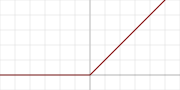|
|2|(64, 16)|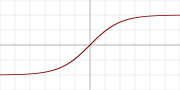|
|3|(16, 8)|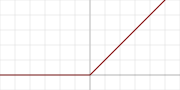|
|3|(16, 8)|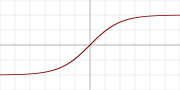|

**Python 함수가이드**
```
from sklearn.neural_network import MLPRegressor
random_state=1234
- feature 순서는 close_1, close_2, … , close_6 순으로 할 것
문제 지시 외 파라미터는 default 값 사용
```

In [103]:
from sklearn.neural_network import MLPRegressor

# 후보 Hyperparameter를 dict 형태로 정리하여 List로 구성합니다.
mlp_params = [
    {'hidden_layer_sizes': (64, 16), 'activation': 'relu'},
    {'hidden_layer_sizes': (64, 16), 'activation': 'tanh'}, # 함수의 중간점이 원점을 지나고 있습니다 - hyperbolic tangent임을 알 수 있습니다.
    {'hidden_layer_sizes': (16, 8), 'activation': 'relu'},
    {'hidden_layer_sizes': (16, 8), 'activation': 'tanh'}
]

X_mlp = ['close_{}'.format(i) for i in range(1, 7)]
scores = [] # 성능을 기록합니다.
for param in mlp_params:
    reg_mlp = MLPRegressor(
        **param, # dictionary unpacking을 통해 dict의 내용을 MLPRegressor Constructor의 Parameter로 전달합니다.
        random_state=1234
    )
    reg_mlp.fit(df_bitcoin4_train[X_mlp], df_bitcoin4_train['close'])
    score = mean_squared_error(df_bitcoin4_test['close'], reg_mlp.predict(df_bitcoin4_test[X_mlp])) ** 0.5
    scores.append(score)
    print(param, score)
scores

{'hidden_layer_sizes': (64, 16), 'activation': 'relu'} 1335.3036809087846
{'hidden_layer_sizes': (64, 16), 'activation': 'tanh'} 19787.503520814076
{'hidden_layer_sizes': (16, 8), 'activation': 'relu'} 1529.3007698911558
{'hidden_layer_sizes': (16, 8), 'activation': 'tanh'} 19793.285373901723


c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[1335.3036809087846,
 19787.503520814076,
 1529.3007698911558,
 19793.285373901723]

In [105]:
np.argmin(scores) + 1, np.min(scores) # 가장 좋은 성능을 도출합니다.

(1, 1335.3036809087846)